# Analyze Zipf’s Law in NLTK corpus

## Zipf’s law: r \* freq = A \* N
r = word rank <br>
freq = word frequency <br>
A = constant.<br>
N = total number of words in collections

## My analysis includes:

1. nltk.corpus.gutenberg [books]
2. nltk.corpus.inaugural [special situation]
4. nltk.corpus.abs [news]

Since Zipf's law requires a collection that is large enough so that it is representive of the language, I'll create one file per package 

In [1]:
import nltk
from nltk import FreqDist
import glob
import os
import shutil
import csv
import string

#### define a function for create csv file for output 

In [2]:
def create_csvfile(filename):   #please replace with your local path while grading
    with open(('/Users/Rui/Documents/INFO 7374/Assignment2/'+ filename + '.csv'),'w+',newline='') as fp: 
        fieldnames = ['Word','Rank','Frequency','Pr(%)','r*Pr']
        writer = csv.DictWriter(fp, fieldnames=fieldnames)
        writer.writeheader()

In [3]:
create_csvfile('gutenberg_analyze')

#### define a function to read packge,filename,word,rank,frequency to Zipf_Law_Analysis.csv

In [4]:
def write_to_file(filename, word_row):
    with open(('/Users/Rui/Documents/INFO 7374/Assignment2/'+ filename + '.csv'),'a',newline='') as fp:   
        li = word_row
        fp.write('%s,%s,%i,%s,%f\n' % li)

* ### Gutenberg

#### generate book lists for all .txt files
* use glob to filter book names
* use os.path.basename to get file names
* use nltk.corpus.gutenberg.words(file) to create a word list

In [5]:
gutenberg_book_list = glob.glob('/Users/Rui/nltk_data/corpora/gutenberg/*txt')

In [6]:
gutenberg_words_list=[]

for book in gutenberg_book_list:
    bookname = os.path.basename(book)
    bookwords = nltk.corpus.gutenberg.words(bookname)
    for w in bookwords:
        gutenberg_words_list.append(w)

In [7]:
print(len(gutenberg_words_list))
print(gutenberg_words_list[:10])    #please remove [:10] while grading

2621613
['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER']


#### define a function that cleans word list
   -lambda inside this function

In [8]:
def formatWordList(wlist):
    wordlist=[]
    wl = [word.lower() for word in wlist]
    wordlist = list(filter(lambda x: x.isalpha(), wl))
    return wordlist

#### clean the wordlist

In [9]:
gutenberg_cleanwords_list = formatWordList(gutenberg_words_list)
print(gutenberg_cleanwords_list[:10])     #please remove [:10] while grading
print(len(gutenberg_cleanwords_list))

['emma', 'by', 'jane', 'austen', 'volume', 'i', 'chapter', 'i', 'emma', 'woodhouse']
2135400


#### define a function that calculate the frequency of distinct words of a list. returns a list of tuple, sort by value

In [10]:
def calculatelist(words_list):
    unilen = len(set(words_list))
    fd = FreqDist(words_list)
    mfd = fd.most_common(unilen)
    return mfd

#### get data from clean worldlist and write to file

In [11]:
gutenberg_sort_list = calculatelist(gutenberg_cleanwords_list)

print(gutenberg_sort_list[:10])    #please remove [:10] while grading
print(len(gutenberg_cleanwords_list))
print(len(gutenberg_sort_list))

[('the', 133583), ('and', 95442), ('of', 71267), ('to', 48057), ('a', 33960), ('in', 33580), ('i', 30265), ('that', 28798), ('he', 25857), ('it', 22303)]
2135400
41487


In [13]:
gsl_len = len(gutenberg_sort_list)
gcl_len = len(gutenberg_cleanwords_list)

a = 0
while a < gsl_len:
    word_name = gutenberg_sort_list[a][0]
    word_Rank = a + 1
    word_freq = gutenberg_sort_list[a][1]
    word_pr = gutenberg_sort_list[a][1]/gcl_len
    word_rpr = word_Rank * word_pr
    word_row = (word_name,word_Rank,word_freq,'{:.01%}'.format(word_pr), word_rpr)
    write_to_file('gutenberg_analyze', word_row)
    a = a + 1

* ### Inaugural 
skip all the detail explanations...process is exactly same as gutenberg

In [20]:
create_csvfile('inaugural_analyze')

In [15]:
inaugural_book_list = glob.glob('/Users/Rui/nltk_data/corpora/inaugural/*txt')

In [16]:
inaugural_words_list=[]

for book in inaugural_book_list:
    bookname = os.path.basename(book)
    bookwords = nltk.corpus.inaugural.words(bookname)
    for w in bookwords:
        inaugural_words_list.append(w)
        
print(len(inaugural_words_list))
print(inaugural_words_list[:10])    #please remove [:10] while grading

145735
['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', 'and', 'of', 'the', 'House']


In [17]:
inaugural_cleanwords_list = formatWordList(inaugural_words_list)
print(inaugural_cleanwords_list[:10])     #please remove [:10] while grading
print(len(inaugural_cleanwords_list))

['fellow', 'citizens', 'of', 'the', 'senate', 'and', 'of', 'the', 'house', 'of']
132124


In [18]:
inaugural_sort_list = calculatelist(inaugural_cleanwords_list)

print(inaugural_sort_list[:10])    #please remove [:10] while grading
print(len(inaugural_cleanwords_list))
print(len(inaugural_sort_list))

[('the', 9906), ('of', 6986), ('and', 5139), ('to', 4432), ('in', 2749), ('a', 2193), ('our', 2058), ('that', 1726), ('we', 1625), ('be', 1460)]
132124
8968


In [21]:
isl_len = len(inaugural_sort_list)
icl_len = len(inaugural_cleanwords_list)

a = 0
while a < isl_len:
    word_name = inaugural_sort_list[a][0]
    word_Rank = a + 1
    word_freq = inaugural_sort_list[a][1]
    word_pr = inaugural_sort_list[a][1]/icl_len
    word_rpr = word_Rank * word_pr
    word_row = (word_name,word_Rank,word_freq,'{:.01%}'.format(word_pr), word_rpr)
    write_to_file('inaugural_analyze', word_row)
    a = a + 1

* ### abc

In [22]:
create_csvfile('abc_analyze')
abc_book_list = glob.glob('/Users/Rui/nltk_data/corpora/abc/*txt')

abc_words_list=[]
for book in abc_book_list:
    bookname = os.path.basename(book)
    bookwords = nltk.corpus.abc.words(bookname)
    for w in bookwords:
        abc_words_list.append(w)
        
print(len(abc_words_list))
print(abc_words_list[:10])    #please remove [:10] while grading

766811
['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has']


In [23]:
abc_cleanwords_list = formatWordList(abc_words_list)
print(abc_cleanwords_list[:10])     #please remove [:10] while grading
print(len(abc_cleanwords_list))

['pm', 'denies', 'knowledge', 'of', 'awb', 'kickbacks', 'the', 'prime', 'minister', 'has']
669936


In [24]:
abc_sort_list = calculatelist(abc_cleanwords_list)

print(abc_sort_list[:10])    #please remove [:10] while grading
print(len(abc_cleanwords_list))
print(len(abc_sort_list))

[('the', 41634), ('of', 19307), ('to', 18671), ('and', 14895), ('a', 14605), ('in', 13356), ('is', 8045), ('that', 7634), ('says', 7482), ('for', 6047)]
669936
26852


In [25]:
asl_len = len(abc_sort_list)
acl_len = len(abc_cleanwords_list)

a = 0
while a < asl_len:
    word_name = abc_sort_list[a][0]
    word_Rank = a + 1
    word_freq = abc_sort_list[a][1]
    word_pr = abc_sort_list[a][1]/acl_len
    word_rpr = word_Rank * word_pr
    word_row = (word_name,word_Rank,word_freq,'{:.01%}'.format(word_pr), word_rpr)
    write_to_file('abc_analyze', word_row)
    a = a + 1

## Create figures

In [26]:
from pylab import *

In [28]:
os.mkdir('/Users/Rui/Documents/INFO 7374/Assignment2/log-log') #please change to your local path while grading

In [29]:
def draw_log(file, descp, start_row_num=0, end_row_num=100000):
    rank_list = []
    freq_list = []
    with open('/Users/Rui/Documents/INFO 7374/Assignment2/'+file, newline='') as fp:
        reader = csv.reader(fp)
        next(reader)
        for row in reader:
            rank_list.append(int(row[1]))
            freq_list.append(int(row[2]))
    plot(rank_list[start_row_num:end_row_num], freq_list[start_row_num:end_row_num], linewidth=1.0)
    xlabel('log rank')
    ylabel('log frequency')
    title('log-log figure')
    grid(True)
    savefig('/Users/Rui/Documents/INFO 7374/Assignment2/log-log/'+os.path.splitext(file)[0]+'_'+descp+'-log-log.png')
    show()   

...more figures were run for conclusion, since figures took too much space I'm showing only 6 here

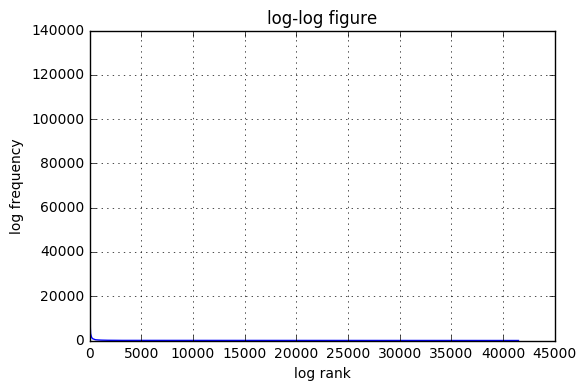

In [30]:
draw_log('gutenberg_analyze.csv','overall')

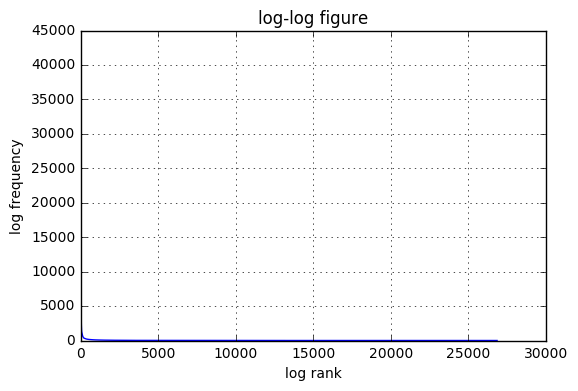

In [31]:
draw_log('abc_analyze.csv','overall')

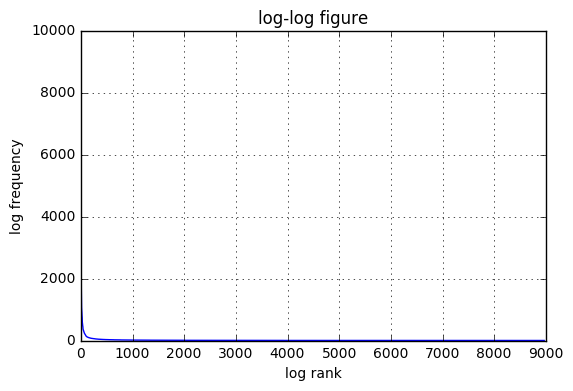

In [32]:
draw_log('inaugural_analyze.csv','overall')

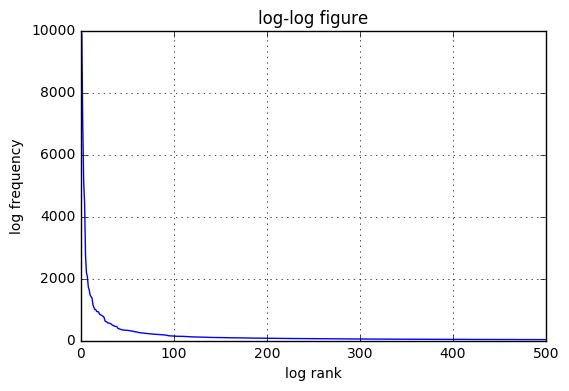

In [33]:
draw_log('inaugural_analyze.csv','first-500',end_row_num=500)

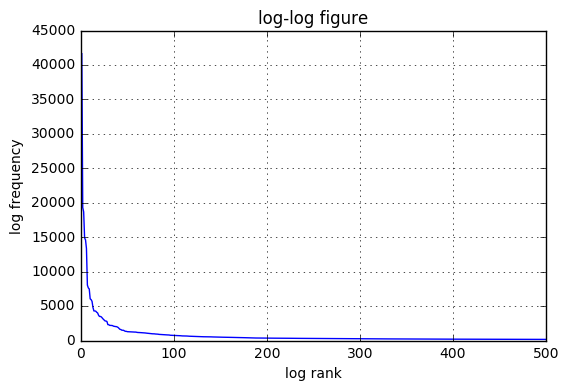

In [34]:
draw_log('abc_analyze.csv','first-500',end_row_num=500)

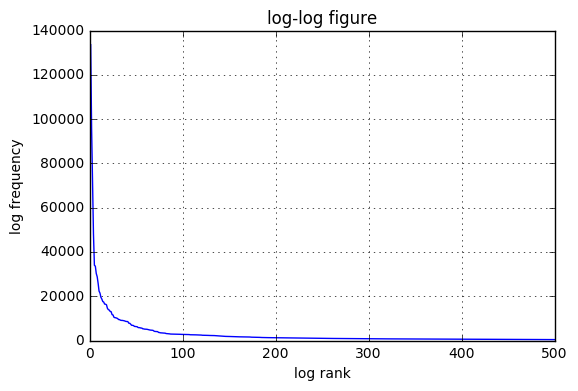

In [35]:
draw_log('gutenberg_analyze.csv','first-500',end_row_num=500)

## Conclusions based on figures

1. The most common 6 words are same across three files
2. Appearantly none of the 3 files match Zipf's law, but their log-log figure looks similar from each other's.
3. Compare to the analysis in [zipfslaw.pdf](http://www.ccs.neu.edu/home/ekanou/ISU535.09X2/Handouts/Review_Material/zipfslaw.pdf), the most common 10 words and their Pr are similar. 
4. There is actually a pattern between frequency and rank, but my collections are too small to prove if nltk corpus follows Zipf's pattern